In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


[2019-12-29 17:25:56,545] INFO in core: Started 


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
S&P 500,45.0,0.172743,0.141643,-0.243487,0.107436,0.195685,0.267743,0.381820,1.163536,8.409288,1.879680,-1.289144
Alibaba,45.0,0.496356,0.501213,-0.500402,0.191888,0.544193,0.756752,1.966693,0.974474,21.837712,4.365282,0.355336
M1,45.0,0.069521,0.249428,-0.672482,-0.090432,0.143440,0.203285,0.519255,0.246902,3.610818,3.413752,-0.988107
CSI 300,45.0,0.090669,0.404537,-0.580704,-0.213340,0.042743,0.347444,0.881428,0.204512,3.540287,6.031529,0.257007


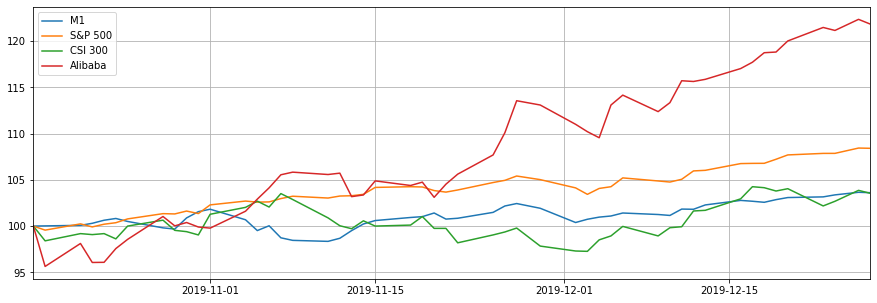

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 50)})
#     ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 50)})
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
#     'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

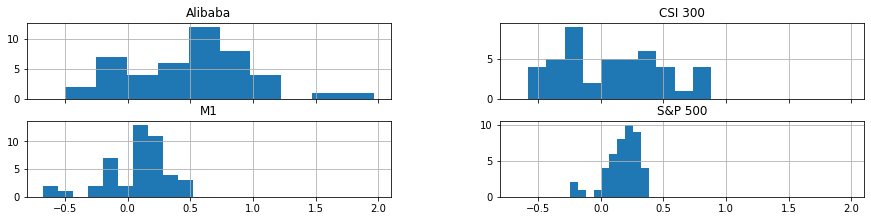

In [3]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(3, 2))